In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from math import pi

### Exercise 1 and 2

In [ ]:
x_axis = np.arange(1,32,1)
y_axis = np.arange(1,13,1)

x_axis, y_axis = np.meshgrid(x_axis, y_axis)

In [6]:
df = pd.read_csv('homework_sampledata1.txt')
df.replace(-99, np.nan, inplace=True)
df.tail()

,2008,1,2,3,4,5,6,7,8,9,10,11,12
26,27,13.5,13.0,19.8,21.9,26.9,NaN,25.8,27.3,24.1,24.0,16.3,17.9
27,28,13.3,12.6,20.9,21.7,28.2,25.9,26.4,26.1,25.0,24.5,15.0,19.4
28,29,12.0,10.4,22.2,23.5,27.8,26.5,26.0,27.6,22.3,24.4,13.2,18.5
29,30,9.6,NaN,21.5,24.0,23.6,27.1,26.0,28.0,22.0,24.7,13.4,14.7
30,31,8.6,NaN,19.3,NaN,24.4,NaN,27.1,25.9,NaN,25.5,NaN,14.6


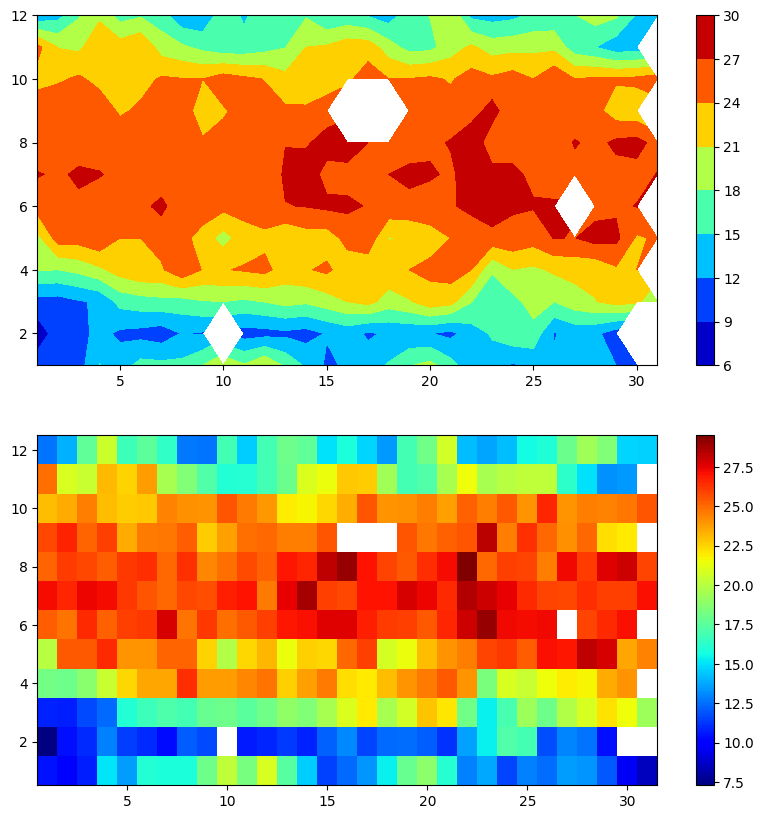

In [26]:
data = df.drop("2008", axis='columns').to_numpy().T

# fig, ax = plt.subplots(2,1)
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(2,1,1)
plt.contourf(x_axis, y_axis, data, cmap = 'jet')        #this is the contour fill
plt.colorbar()

ax = fig.add_subplot(2,1,2)
plt.pcolormesh(x_axis, y_axis, data, cmap = 'jet')      #this is the pcolormesh
plt.colorbar()   

plt.subplots_adjust( hspace = 0.2)
plt.show()

### Exercise 3

In [40]:
X = np.array([])
w,h = 5,6
for col in df.drop('2008', axis='columns'):
    month = df.loc[:, col].to_numpy().astype(np.float16)

    for i in range(0, 26, 5):
        if i == 25:
            X = np.append(X, np.nanmean(month[i:]))
            break
        X = np.append(X, np.nanmean(month[i:i+5]))
    
X = X.reshape(12,6)
X[0]

array([11.921875 , 17.15625  , 16.53125  , 15.5390625, 13.4609375,
       11.5859375])

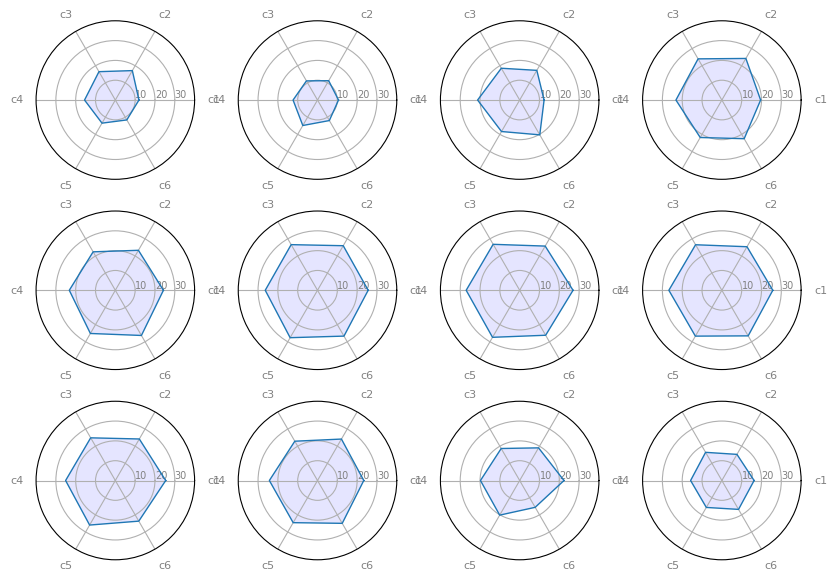

In [48]:
no_category = np.size(X, 1)
#now drawing...
fig = plt.figure(figsize=(10, 7))
for i in range(0, 12):
    ax = plt.subplot(3, 4, i+1, polar=True)

    angles = [n / float(no_category) * 2 * pi for n in range(no_category)]
    angles += angles[:1]

    plt.xticks(angles[:-1], ['c1', 'c2', 'c3', 'c4', 'c5','c6' ], color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)

    # Plot data
    toto = np.concatenate((X[i,:], X[i,:1]))

    ax.plot(angles, toto , linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, toto, 'b', alpha=0.1)

# Show the graph
plt.show()

### Exercise 4

In [58]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]



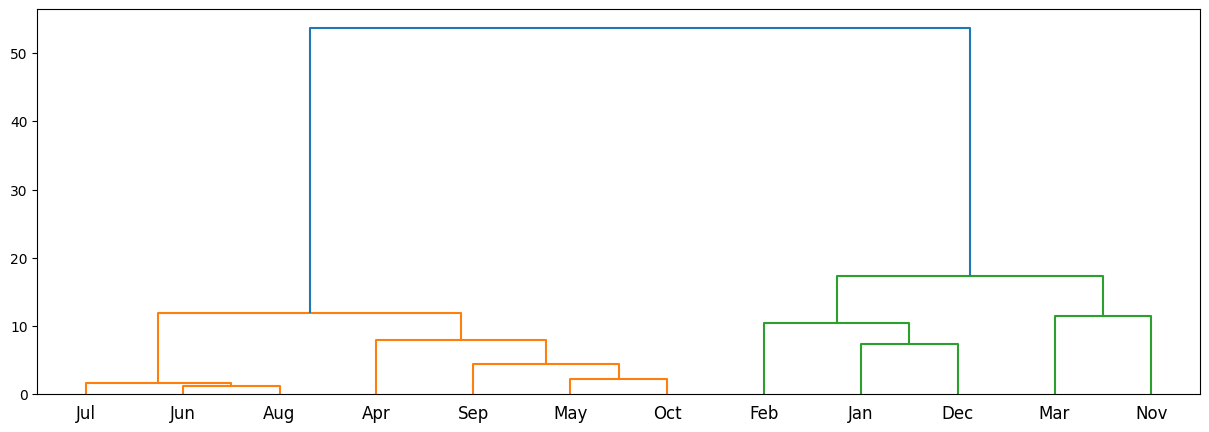

In [62]:
fig = plt.figure(figsize=(15, 5))
Z = linkage(X, 'ward')
dn = dendrogram(Z, labels=months)

plt.show()